In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import date
import scipy as sp
import ipywidgets as ipw
import matplotlib.mlab as mlab
import numpy as np
import statsmodels.api as sm

In [2]:
df_capital_cities = pd.read_csv('Documents\Python Scripts\Project\capital_cities.csv')
df_capital_cities.head()

,Country,Capital,Latitude,Longitude
0,Argentina,Buenos Aires,-34.604,-58.382
1,Australia,Canberra,-35.282,149.129
2,Brazil,Brasília,-15.794,-47.882
3,Canada,Ottawa,45.422,-75.697
4,China,Beijing,39.904,116.407


# Select the country from the dropdown menu and run all cells below

In [3]:

ddown = ipw.Dropdown(options=df_capital_cities['Country'], disabled = False,)
#country = ipw.Output()

country = None

def on_change(change):
    global country
    country = change.new
    #selected_opt = change['new']
    #with country:
    #    country.clear_output()
        
     #   print(selected_opt)
    
ddown.observe(on_change, names='value')
display(ddown)


Dropdown(options=('Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indone…

In [4]:
country

'Saudi Arabia'

In [5]:
#country = 'Ireland'
lat = df_capital_cities[df_capital_cities['Country']==country]['Latitude'].iloc[0]
long = df_capital_cities.loc[df_capital_cities['Country']==country]['Longitude'].values[0]

In [6]:
today_year = date.today().year
today_month = (f'{date.today().month:02}')
today_day = (f'{date.today().day:02}')

In [7]:
month_dict = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [8]:
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=' + str(lat) +'&longitude='+ str(long)+'&start_date=1940-01-01&end_date=' + str(today_year) + '-' + str(today_month) + '-' + str(today_day) +'&daily=temperature_2m_mean,precipitation_sum&timezone=Europe%2FLondon'

In [9]:
r = requests.get(url)
json_data = r.json()

In [10]:
mycols = list(json_data['daily'].keys())
mycols

['time', 'temperature_2m_mean', 'precipitation_sum']

In [11]:
df_daily = pd.DataFrame.from_dict(json_data['daily'])
df_daily['time']=pd.to_datetime(df_daily['time'])
df_daily.rename(columns={'time':'Date','temperature_2m_mean':'mean_temp','precipitation_sum':'tot_rain'}, inplace=True)
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30549 entries, 0 to 30548
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       30549 non-null  datetime64[ns]
 1   mean_temp  30541 non-null  float64       
 2   tot_rain   30541 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 716.1 KB


In [12]:
nan_rows = df_daily[df_daily[['mean_temp','tot_rain']].isnull().any(axis=1)]
nan_rows

,Date,mean_temp,tot_rain
0,1940-01-01,NaN,NaN
30542,2023-08-15,NaN,NaN
30543,2023-08-16,NaN,NaN
30544,2023-08-17,NaN,NaN
30545,2023-08-18,NaN,NaN
30546,2023-08-19,NaN,NaN
30547,2023-08-20,NaN,NaN
30548,2023-08-21,NaN,NaN


In [13]:
df_daily = df_daily.dropna()

In [14]:
df_daily['year'] = df_daily['Date'].dt.year
df_daily['month']=df_daily['Date'].dt.month
df_daily.head()

,Date,mean_temp,tot_rain,year,month
1,1940-01-02,15.4,0.0,1940,1
2,1940-01-03,15.4,0.0,1940,1
3,1940-01-04,15.7,0.0,1940,1
4,1940-01-05,13.0,0.0,1940,1
5,1940-01-06,10.2,0.0,1940,1


In [15]:
df_daily.set_index('Date', inplace=True)
df2 = df_daily.resample('MS').mean()
df_monthly = df2[['mean_temp','month','year']]
df_monthly.head(25)

,mean_temp,month,year
Date,,,
1940-01-01,12.716667,1,1940
1940-02-01,16.093103,2,1940
1940-03-01,15.835484,3,1940
1940-04-01,23.063333,4,1940
1940-05-01,29.712903,5,1940
1940-06-01,32.270000,6,1940
1940-07-01,32.716129,7,1940
1940-08-01,33.335484,8,1940
1940-09-01,29.150000,9,1940


In [16]:
df_monthly.sort_values('mean_temp', ascending=False).head(10)

,mean_temp,month,year
Date,,,
2017-07-01,37.254839,7,2017
1998-08-01,37.019355,8,1998
2020-07-01,36.990323,7,2020
2021-07-01,36.903226,7,2021
2023-08-01,36.785714,8,2023
2012-07-01,36.629032,7,2012
2023-07-01,36.551613,7,2023
2010-08-01,36.490323,8,2010
2017-08-01,36.458065,8,2017


In [17]:
df_RA = pd.DataFrame()
suffix = ('_Jan','_Feb','_Mar','_Apr','_May','_Jun','_Jul','_Aug','_Sep','_Oct','_Nov','_Dec')

pd.set_option('mode.chained_assignment', None)

for i in range(1, 13):
    df_temp=[]
    df_temp = df_monthly.loc[df_monthly.index.month==i,:]
    df_temp['rolling_avg'] = df_temp['mean_temp'].rolling(5).mean()
    df_temp = df_temp.reset_index()
    df_temp['Year'] = pd.DatetimeIndex(df_temp['Date']).year
    df_temp = df_temp.set_index('Year')
    df_temp = df_temp[['rolling_avg']]
    
    if i == 1:
        df_RA = df_temp
    else:
        df_RA = df_RA.merge(df_temp, on='Year', how='left', suffixes=('',suffix[i-1]))
        
df_RA.rename(columns={'rolling_avg':'rolling_avg_Jan'}, inplace=True)
df_RA.head(20)


,rolling_avg_Jan,rolling_avg_Feb,rolling_avg_Mar,rolling_avg_Apr,rolling_avg_May,rolling_avg_Jun,rolling_avg_Jul,rolling_avg_Aug,rolling_avg_Sep,rolling_avg_Oct,rolling_avg_Nov,rolling_avg_Dec
Year,,,,,,,,,,,,
1940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,13.609785,16.341133,19.205806,24.680667,30.707742,32.401333,33.398710,32.604516,29.853333,25.360645,18.760667,13.612258
1945,13.308387,15.793941,19.613548,25.134000,30.874194,32.643333,33.627742,32.625806,29.978667,25.042581,19.214000,13.335484
1946,12.819355,15.272512,19.451613,25.426667,30.689677,32.528667,33.520645,32.816129,30.122667,24.903226,19.096000,12.869677
1947,12.600645,14.028227,18.896129,25.273333,30.350968,32.760667,33.667742,33.021290,30.188667,25.066452,18.751333,13.072903
1948,12.309032,14.136675,19.124516,25.013333,30.144516,32.958000,33.650323,33.044516,30.009333,24.885161,18.946000,13.037419


In [18]:
df_RA_spring = df_RA[['rolling_avg_Mar','rolling_avg_Apr','rolling_avg_May']]
df_RA_summer = df_RA[['rolling_avg_Jun','rolling_avg_Jul','rolling_avg_Aug']]
df_RA_autumn = df_RA[['rolling_avg_Sep','rolling_avg_Oct','rolling_avg_Nov']]
df_RA_winter = df_RA[['rolling_avg_Dec','rolling_avg_Jan','rolling_avg_Feb']]

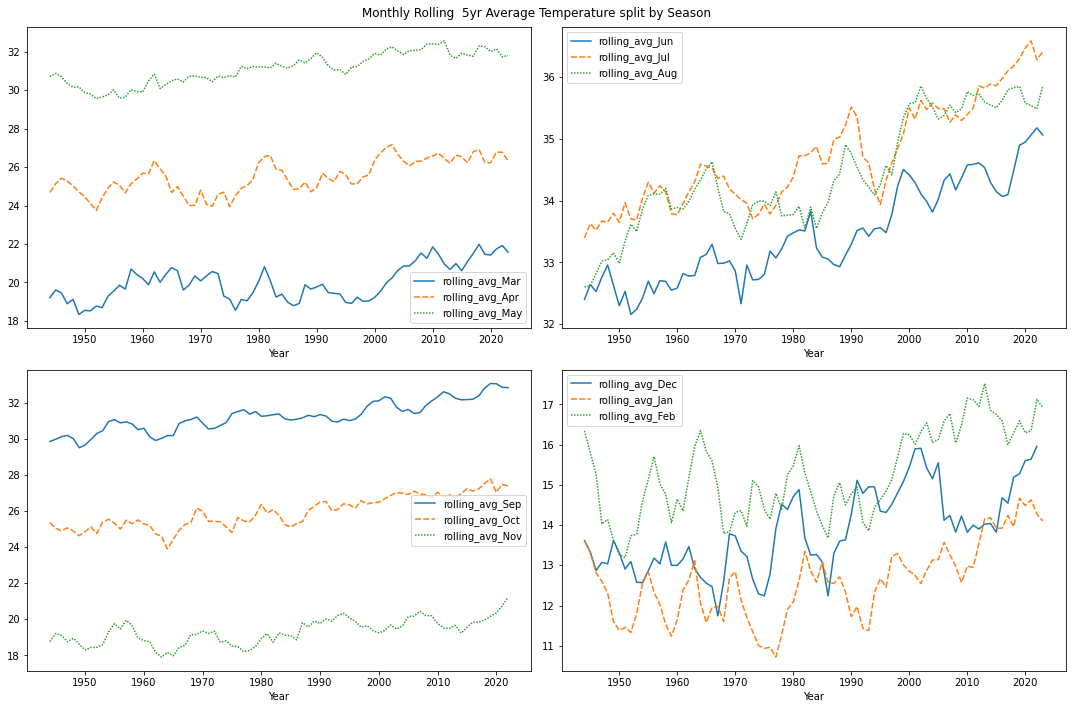

In [19]:
fig, ax=plt.subplots(2,2, figsize=(15,10))
sns.lineplot(data=df_RA_spring, ax=ax[0,0])
sns.lineplot(data=df_RA_summer, ax=ax[0,1])
sns.lineplot(data=df_RA_autumn, ax=ax[1,0])
sns.lineplot(data=df_RA_winter, ax=ax[1,1])
plt.suptitle("Monthly Rolling  5yr Average Temperature split by Season")
fig.tight_layout()
plt.show()

In [20]:
df_month1 = df_daily.groupby('month')[['mean_temp','tot_rain']].mean().reset_index()
df_month1.rename(columns={'mean_temp':'temp_month_avg','tot_rain':'rain_month_avg'}, inplace=True)
df_month_avg= df_month1[['month','temp_month_avg']]
df_month_avg

,month,temp_month_avg
0,1,12.633269
1,2,15.364897
2,3,20.018433
3,4,25.512897
4,5,31.122811
5,6,33.448413
6,7,34.729800
7,8,34.414380
8,9,31.225502
9,10,25.961018


In [21]:
df_merge = pd.merge(df_monthly, df_month_avg, on='month', how='left')
df_merge['Rel_temp'] = round(df_merge['mean_temp']/df_merge['temp_month_avg'],3)
df_merge.head(10)

,mean_temp,month,year,temp_month_avg,Rel_temp
0,12.716667,1,1940,12.633269,1.007
1,16.093103,2,1940,15.364897,1.047
2,15.835484,3,1940,20.018433,0.791
3,23.063333,4,1940,25.512897,0.904
4,29.712903,5,1940,31.122811,0.955
5,32.270000,6,1940,33.448413,0.965
6,32.716129,7,1940,34.729800,0.942
7,33.335484,8,1940,34.414380,0.969
8,29.150000,9,1940,31.225502,0.934
9,25.829032,10,1940,25.961018,0.995


In [22]:
#df_merge.to_csv(r'Documents\Python Scripts\Project\temp.csv')

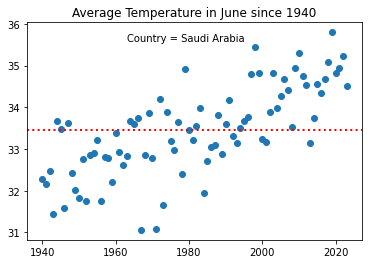

In [23]:
# change the month variable to run analysis on particular month

month = 6
df_merge_month = df_merge.loc[df_merge['month']==month]
df_merge_month.head()

fig, ax = plt.subplots()
avg = df_month_avg.loc[df_month_avg['month']==month]['temp_month_avg'].values[0]
ax.scatter(df_merge_month['year'], df_merge_month['mean_temp'])

plt.axhline(y=avg, color='red', linestyle='dotted', linewidth=2)
plt.title('Average Temperature in ' + month_dict[month] + ' since 1940')
plt.text(0.3, .95, 'Country = '+ country, ha='left', va='top', transform=ax.transAxes)
plt.show()

In [24]:
df1_RA = df_RA.dropna()
df2_RA = df1_RA.reset_index()
df2_RA.head()

,Year,rolling_avg_Jan,rolling_avg_Feb,rolling_avg_Mar,rolling_avg_Apr,rolling_avg_May,rolling_avg_Jun,rolling_avg_Jul,rolling_avg_Aug,rolling_avg_Sep,rolling_avg_Oct,rolling_avg_Nov,rolling_avg_Dec
0,1944,13.609785,16.341133,19.205806,24.680667,30.707742,32.401333,33.398710,32.604516,29.853333,25.360645,18.760667,13.612258
1,1945,13.308387,15.793941,19.613548,25.134000,30.874194,32.643333,33.627742,32.625806,29.978667,25.042581,19.214000,13.335484
2,1946,12.819355,15.272512,19.451613,25.426667,30.689677,32.528667,33.520645,32.816129,30.122667,24.903226,19.096000,12.869677
3,1947,12.600645,14.028227,18.896129,25.273333,30.350968,32.760667,33.667742,33.021290,30.188667,25.066452,18.751333,13.072903
4,1948,12.309032,14.136675,19.124516,25.013333,30.144516,32.958000,33.650323,33.044516,30.009333,24.885161,18.946000,13.037419


<function matplotlib.pyplot.show(close=None, block=None)>

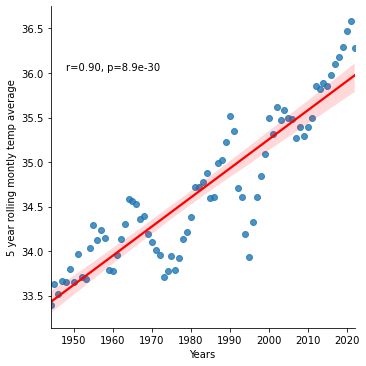

In [25]:
# Change the month_reg variable to run regression analysis on rolling averages for selected month

month_reg = 7

month_reg_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

g = sns.lmplot(x='Year', y='rolling_avg_'+ month_reg_dict[month_reg], data=df2_RA, order = 1, line_kws={'color': 'red'})

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(x=df2_RA['Year'], y=df2_RA['rolling_avg_' + month_reg_dict[month_reg]])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
g.map_dataframe(annotate)

plt.xlabel('Years')
plt.ylabel('5 year rolling montly temp average')
plt.show

In [26]:
df_merge1 = df_monthly.merge(df_month_avg, left_on='month', right_on='month')
df_merge1['Rel_temp'] = round(df_merge1['mean_temp']-df_merge1['temp_month_avg'],3)

In [27]:
month1 = 7
df_merge_month = df_merge1.loc[df_merge1['month']==month1]

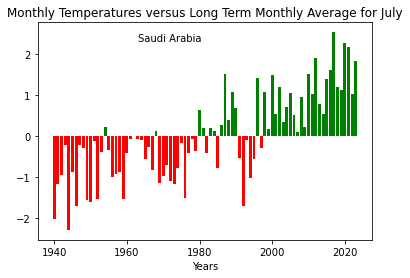

In [28]:
fig, ax = plt.subplots()
ax.bar(df_merge_month['year'], df_merge_month['Rel_temp'],  color=(df_merge_month['Rel_temp'] > 0).map({True: 'g', False: 'r'}))
plt.title('Monthly Temperatures versus Long Term Monthly Average for ' + month_dict[month1])
plt.text(0.3, .95, country, ha='left', va='top', transform=ax.transAxes)
plt.xlabel('Years')
plt.show()

In [29]:
df_daily_normtest = df_daily.loc[df_daily['month']==month1]
df_daily_normtest.head()

,mean_temp,tot_rain,year,month
Date,,,,
1940-07-01,30.5,0.0,1940,7
1940-07-02,30.6,0.0,1940,7
1940-07-03,31.3,0.0,1940,7
1940-07-04,30.3,0.0,1940,7
1940-07-05,30.2,0.0,1940,7


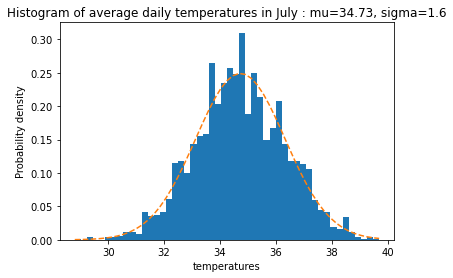

In [35]:
mu = np.mean(df_daily_normtest['mean_temp'])
sigma = np.std(df_daily_normtest['mean_temp'])

num_bins = 50

fig, ax = plt.subplots()


n, bins, patches = ax.hist(df_daily_normtest['mean_temp'], num_bins, density=True)


y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('temperatures')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of average daily temperatures in ' + month_dict[month1] +' : mu=' + str(round(mu,2)) +', sigma='+ str(round(sigma,2)))

plt.show()

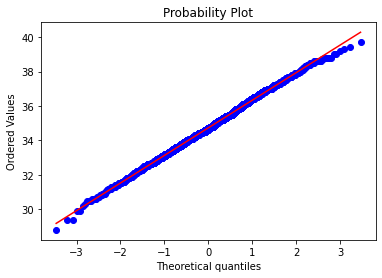

In [31]:
import pylab 
import scipy.stats as stats

stats.probplot(df_daily_normtest['mean_temp'], dist="norm", plot=pylab)
pylab.show()

In [32]:
df_monthly_normtest = df_monthly.loc[df_monthly['month']==month1]
df_monthly_normtest.head()

,mean_temp,month,year
Date,,,
1940-07-01,32.716129,7,1940
1941-07-01,33.551613,7,1941
1942-07-01,33.767742,7,1942
1943-07-01,34.519355,7,1943
1944-07-01,32.438710,7,1944


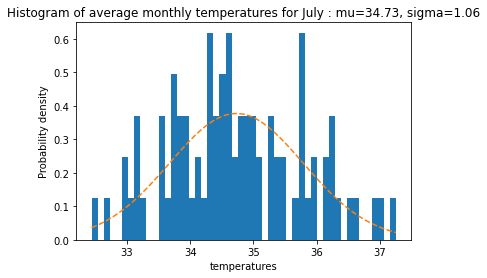

In [36]:
mu = np.mean(df_monthly_normtest['mean_temp'])
sigma = np.std(df_monthly_normtest['mean_temp'])

num_bins = 50

fig, ax = plt.subplots()

n, bins, patches = ax.hist(df_monthly_normtest['mean_temp'], num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('temperatures')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of average monthly temperatures for ' + month_dict[month1] +' : mu=' + str(round(mu,2)) +', sigma='+ str(round(sigma,2)))

plt.show()

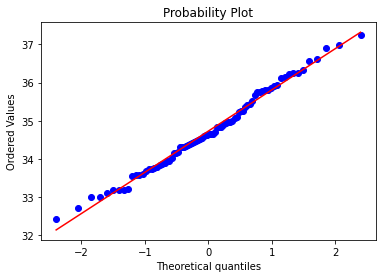

In [34]:
stats.probplot(df_monthly_normtest['mean_temp'], dist="norm", plot=pylab)
pylab.show()